# Aula 1
Básico de Pandas/Dataframe

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [5]:
df.head() #numero dentro do head traz a quantidade de linhas, o default é 5

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [8]:
df.shape

(133349, 11)

In [9]:
linhas, colunas = df.shape[0], df.shape[1]
print('O DataFrame possui:', linhas, 'linhas e', colunas, 'colunas.' )

O DataFrame possui: 133349 linhas e 11 colunas.


In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
df = df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
})

df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [12]:
df['senioridade'].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

SE = senior
MI = pleno/mid
EN = Entry/Junior
EX = Executivo

In [13]:
df["contrato"].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

FT = Full Time
CT = Contrato Temporario
PT = Part Time/Meio Periodo
FL = Free Lance

In [14]:
df['remoto'].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

0 = trabalho presenciais
100 = remoto
50 = hibrido

In [15]:
df['tamanho_empresa'].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

M = média
L = large/grande
S = small/pequena

In [16]:
# Dicionário com mapeamento de senioridade
senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

# Aplicar a tradução
df['senioridade'] = df['senioridade'].map(senioridade)

# Verificar a tradução
df['senioridade'].value_counts()

senioridade
Sênior       77241
Pleno        40465
Júnior       12443
Executivo     3200
Name: count, dtype: int64

In [17]:
# Dicionário com mapeamento de contrato
mapeamento_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato Temporário',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
}

# Aplicar a tradução
df['contrato'] = df['contrato'].map(mapeamento_contrato)

# Verificar a tradução
df['contrato'].value_counts()

contrato
Tempo Integral         132563
Contrato Temporário       394
Meio Período              376
Freelancer                 16
Name: count, dtype: int64

In [18]:
# Dicionário com mapeamento de tamanho da empresa
mapeamento_tamanho = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}

# Aplicar a tradução
df['tamanho_empresa'] = df['tamanho_empresa'].map(mapeamento_tamanho)

# Verificar a tradução
df['tamanho_empresa'].value_counts()

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [19]:
# Dicionário com mapeamento de trabalho remoto
mapeamento_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

# Aplicar a tradução
df['remoto'] = df['remoto'].map(mapeamento_remoto)

# Verificar a tradução
df['remoto'].value_counts()

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [20]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [21]:
df.describe(include=object) #devolve as estatísticas descritivas das colunas com letras

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Aula 2
Comandos de limpeza e preparação de dataframe, mexer com valores nulos somente com funções simples, sem estatística avançada


In [22]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [24]:
df.isnull().sum() #verifica a quantidade de valores nulos em cada coluna

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [25]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [26]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [27]:
import numpy as np

#cria uma nova dataframe de exemplo teste
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

#calcula a média e substitui os valores nulos
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2)) #preenche os valores nulos com a média arredondada para 2 casas decimais
#calcula a mediana e substitui os valores nulos
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median()) #preenche os valores nulos com a mediana
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [28]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['Temperatura'].ffill() #preenche os valores nulos com o valor anterior
#ffill = forward fill
df_temperaturas


,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [29]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['Temperatura'].bfill() #preenche os valores nulos com o valor posterior
#bfill = backward fill
df_temperaturas


,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [30]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado') #preenche os valores nulos com 'Não informado'
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [31]:
df_limpo = df.dropna() #remove as linhas com valores nulos
df_limpo.isnull().sum()


ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [32]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [33]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [34]:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('int64')) #converte a coluna 'ano' para inteiro

In [35]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# Aula3
Gráficos


In [36]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


/home/felipe/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

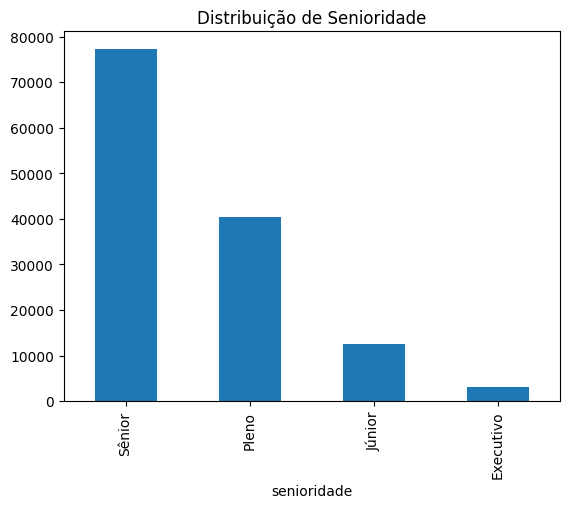

In [37]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='senioridade'>

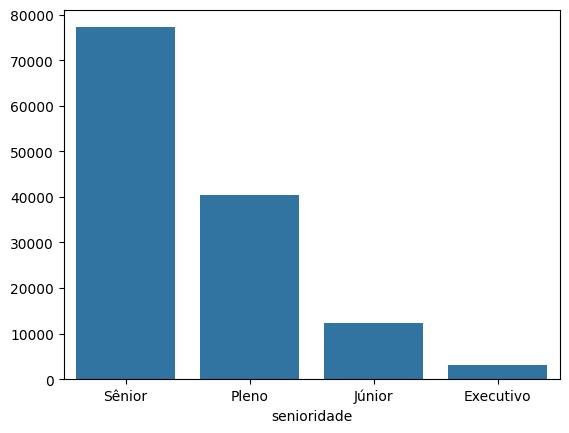

In [39]:
sns.barplot(x=df_limpo['senioridade'].value_counts().index, y=df_limpo['senioridade'].value_counts().values)

<Axes: xlabel='senioridade', ylabel='usd'>

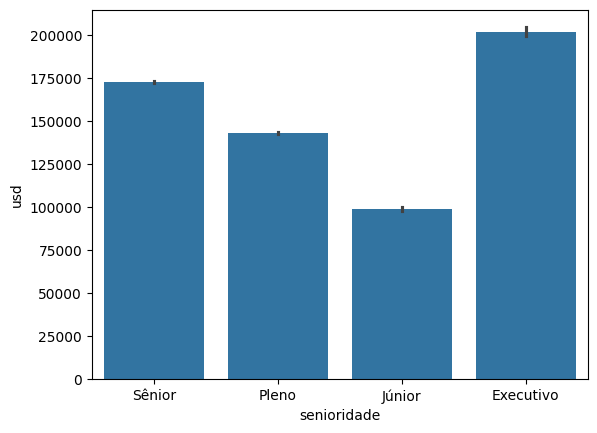

In [40]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

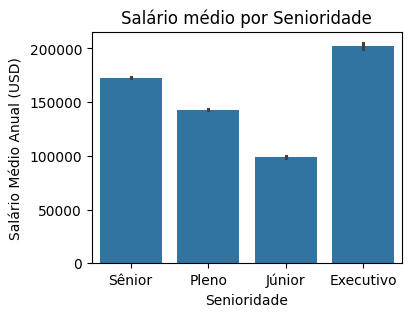

In [41]:
'''O gráfico do seaborn já é modificado pelo matplotlib, não precisa criar um grafico com as duas bibliotecas, basta configurar pelo matplotlib
    que as alterações serão refletidas no gráfico do seaborn.'''
plt.figure(figsize=(4,3)) #define o tamanho da figura em a \times 100 
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

In [42]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Sênior       172850.838301
Pleno        143044.845979
Júnior        99034.963267
Name: usd, dtype: float64

In [43]:
#criar um variavel para armazenar a ordenação do maior para o menor
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Júnior'], dtype='object', name='senioridade')

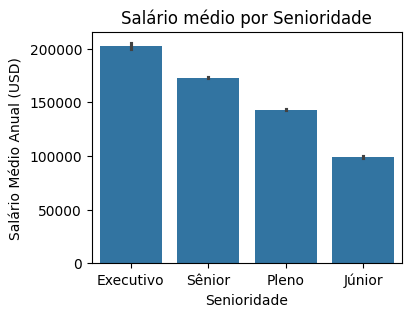

In [44]:
#gráfico mais visualizavel
plt.figure(figsize=(4,3))
sns.barplot(data=df_limpo, x='senioridade', y='usd',order=ordem)
plt.title('Salário médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

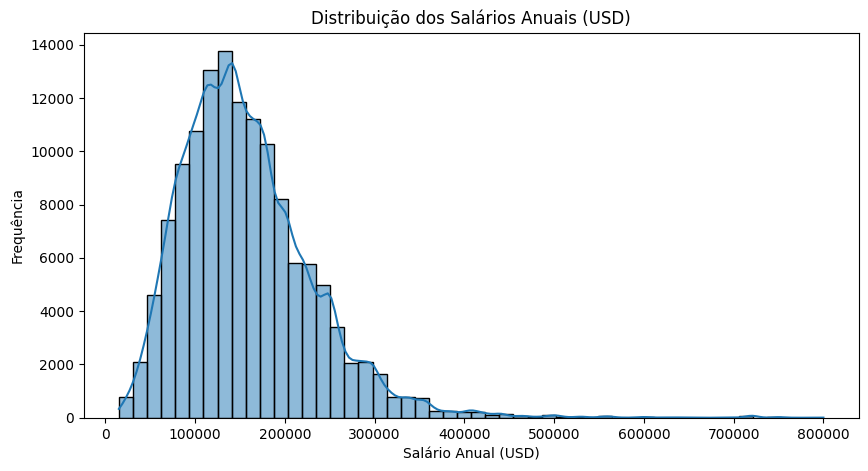

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins=50, kde=True) #kde=True adiciona a curva de densidade em cada valor
plt.title('Distribuição dos Salários Anuais (USD)')
plt.xlabel('Salário Anual (USD)')
plt.ylabel('Frequência')
plt.show()

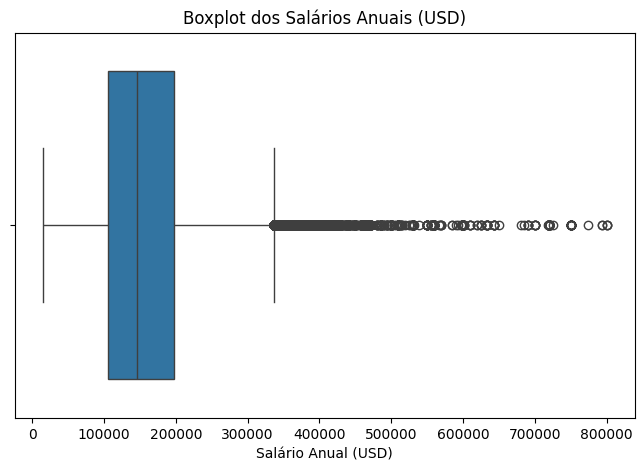

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.xlabel('Salário Anual (USD)')
plt.title('Boxplot dos Salários Anuais (USD)')
plt.show()

Boxplot é o plot de whisker

Extremidades indicando variância

Linha do meio é a mediana

Quartis (25% e 75%) representados pela caixa preenchida

Pontos indicam dados discrepantes do intervalos

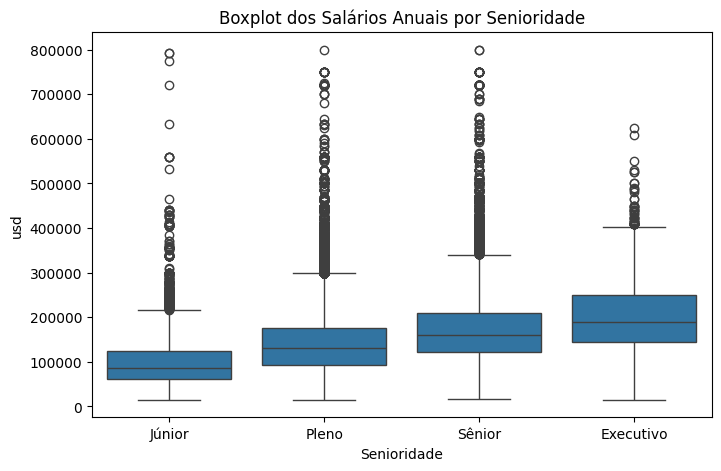

In [47]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Boxplot dos Salários Anuais por Senioridade')
plt.xlabel('Senioridade')
plt.show()

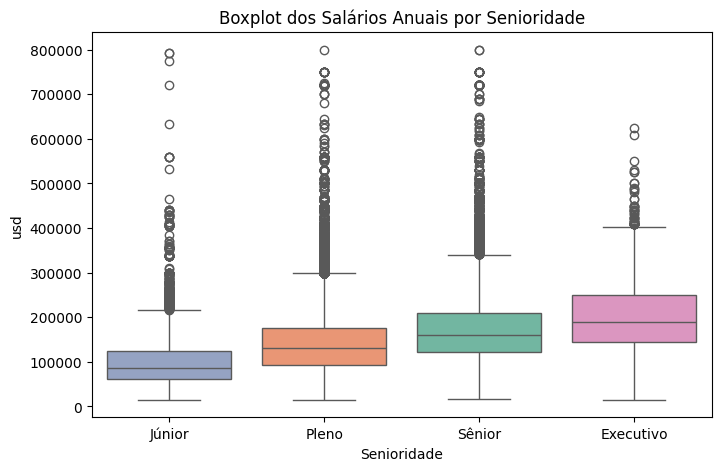

In [48]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot dos Salários Anuais por Senioridade')
plt.xlabel('Senioridade')
plt.show()

In [49]:
import plotly.express as px

In [52]:
senioridade_media_salarial = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index() #reset index reseta os valores e pega so o nome da coluna

figura = px.bar(senioridade_media_salarial, 
                x='senioridade', 
                y='usd',
                title='Media Salarial por Senioridade',
                labels={'senioridade': 'Senioridade', 'usd': 'Salário Médio Anual (USD)'},
                category_orders={'senioridade': ['Júnior', 'Pleno', 'Sênior', 'Executivo']})
figura.show()

In [54]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()

remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
                names='tipo_trabalho',
                values='quantidade',
                title='Distribuição de Tipos de Trabalho (Remoto vs Presencial)'
            )
fig.show()

In [55]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()

remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
                names='tipo_trabalho',
                values='quantidade',
                title='Distribuição de Tipos de Trabalho (Remoto vs Presencial)',
                hole=0.5
            )
fig.show()

In [56]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()

remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
                names='tipo_trabalho',
                values='quantidade',
                title='Distribuição de Tipos de Trabalho (Remoto vs Presencial)',
                hole=0.5
            )
fig.update_traces(textinfo='percent+label')
fig.show()

Criar grafico de salario por país

Cargo de cientista de dados gerar visualização de salario medio por país

Usar plotly

In [57]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


Residencia está em US AU....

In [67]:
df_limpo.value_counts('residencia')

cargo
Data Scientist                  17311
Software Engineer               15006
Data Engineer                   14868
Data Analyst                    12381
Engineer                         9454
                                ...  
Business Insights Manager           1
Business Development Manager        1
Big Data Analyst                    1
Backend Software Engineer           1
Data & Analytics Analyst            1
Name: count, Length: 390, dtype: int64

In [64]:
pais_media_salarial = df_limpo.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index() #reset index reseta os valores e pega so o nome da coluna

figura = px.bar(pais_media_salarial, 
                x='residencia', 
                y='usd',
                title='Media Salarial por País',
                labels={'residencia': 'País', 'usd': 'Salário Médio Anual (USD)'})
figura.show()

In [73]:
#criar gráfico salarial somente para cientista de dados
df_cientista_de_dados = df_limpo[df_limpo['cargo'].isin(['Data Scientist', 'Cientista de Dados'])]
media_de_pais = df_cientista_de_dados.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(media_de_pais, 
             x='residencia', 
             y='usd',
             title='Média Salarial por País para Cientistas de Dados',
             labels={'residencia': 'País', 'usd': 'Salário Médio Anual (USD)'})
fig.show()

In [74]:
# Filtrar cargos que contenham 'data' ou 'dados' (case-insensitive)
df_cargos_data = df_limpo[df_limpo['cargo'].str.contains('data|dados', case=False, na=False)]
# Mostrar contagem por cargo
df_cargos_data['cargo'].value_counts()

cargo
Data Scientist                       17311
Data Engineer                        14868
Data Analyst                         12381
Data Architect                        2024
Data Manager                           975
                                     ...  
People Data Analyst                      1
Big Data Analyst                         1
Safety Data Management Specialist        1
Marketing Data Scientist                 1
Data Scientist Expert                    1
Name: count, Length: 152, dtype: int64

In [75]:
#criar gráfico salarial somente para quem trabalha com dados
media_de_pais_data = df_cargos_data.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(df_cargos_data, 
             x='residencia', 
             y='usd',
             title='Média Salarial por País para Cientistas de Dados',
             labels={'residencia': 'País', 'usd': 'Salário Médio Anual (USD)'})
fig.show()

Gerou um problema pois algumas pessoas recebem bastante em alguns países que possuem menos pessoas trabalhando

O ideal seria ou fazer as analises em cada cargo, ou ainda excluir executivos ou salarios altos por algum outro método, que vai depender de cada situação